In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder


In [40]:
df = pd.read_csv("input/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
df.drop(['RowNumber','CustomerId', 'Surname'], axis=1, inplace=True)

In [42]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [44]:
# intancia do encoder
encoder = OneHotEncoder()

# cria os encoders
encoded = encoder.fit_transform(df[['Geography', 'Gender']])

In [45]:
# transformando o que foi encodado em dataframe
df_novo = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())
df_novo.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0


In [46]:
# concatenando o dataframe encodado com o antigo excluindo as variaveis que foram encodadas
df_final = pd.concat([df.drop(['Geography', 'Gender'],axis=1),df_novo],axis=1)
df_final

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0,1.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0,1.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1.0,0.0,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0,1.0,0.0,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,1,1.0,0.0,0.0,1.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.0,1.0,0.0,0.0,1.0


In [48]:
# separando as features do target
x = df_final.drop('Exited',axis=1)
y = df_final['Exited']

In [58]:
# testando as variaveis para o modelo
valores_n = np.array([3,5,7,9,11])
valores_p = np.array([1,2,100])
valores_grid = {'n_neighbors': valores_n, 'p':valores_p}

# normalizando os dados de x
normalizador = MinMaxScaler(feature_range=(0,1))
x_norm = normalizador.fit_transform(x)

#instanciando o modelo
modelo = KNeighborsClassifier()

#criando o grid
grid = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=5)
grid.fit(x_norm,y)

print('Melhor score:', grid.best_score_)
print('Melhor p:', grid.best_estimator_.p)
print('Melhor n:', grid.best_estimator_.n_neighbors)

Melhor score: 0.8198000000000001
Melhor p: 1
Melhor n: 11


In [78]:
# separando treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=123)

In [79]:
# instanciando o modelo
modelo = KNeighborsClassifier(n_neighbors=11, p=1)

# treinando o modelo
modelo.fit(x_train, y_train)

# avaliando a acuracia
modelo.score(x_test, y_test)

0.8185

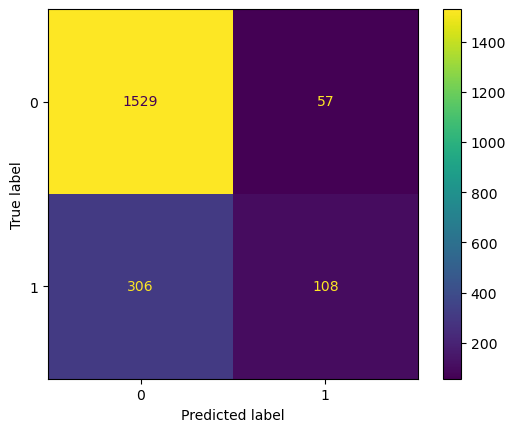

In [80]:
# prediçao com o conjunto de teste
y_pred = modelo.predict(x_test)

# criando matriz de confusao
cm = confusion_matrix(y_test, y_pred)

# plotando a matriz
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [84]:
# criando as prediçoes em forma de probabilidade
pred = modelo.predict_proba(x_test)
probs = pred[:,1] # todas as linhas da primeira coluna da minha predição

# criando roc 
tpr, fpr, treshold = roc_curve(y_test, probs)

print(tpr)
print(fpr)
print(treshold)

[0.         0.         0.00126103 0.00315259 0.00882724 0.01576293
 0.03593947 0.06809584 0.11160151 0.21437579 0.36633039 0.61916772
 1.        ]
[0.         0.00483092 0.01690821 0.03864734 0.07971014 0.16425121
 0.26086957 0.37198068 0.52415459 0.64009662 0.78502415 0.91062802
 1.        ]
[2.         1.         0.90909091 0.81818182 0.72727273 0.63636364
 0.54545455 0.45454545 0.36363636 0.27272727 0.18181818 0.09090909
 0.        ]


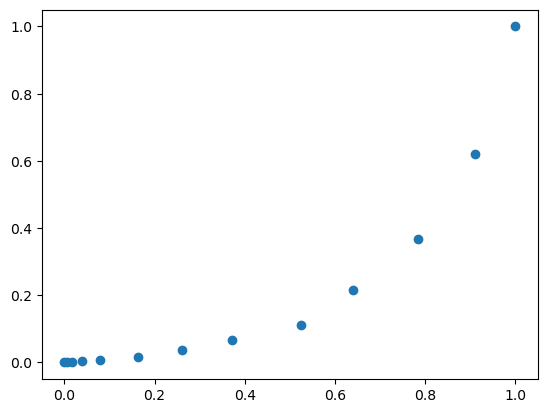

In [90]:
plt.scatter(fpr, tpr)

In [87]:
print(roc_auc_score(y_test, probs))

0.7814862535104873
